In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


In [299]:
df = pd.read_csv('housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [301]:
df.shape

(545, 13)

In [302]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [303]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [304]:
df.duplicated().sum()

np.int64(0)

In [305]:
df.select_dtypes(include=[np.number]).corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [306]:
data = df.copy()

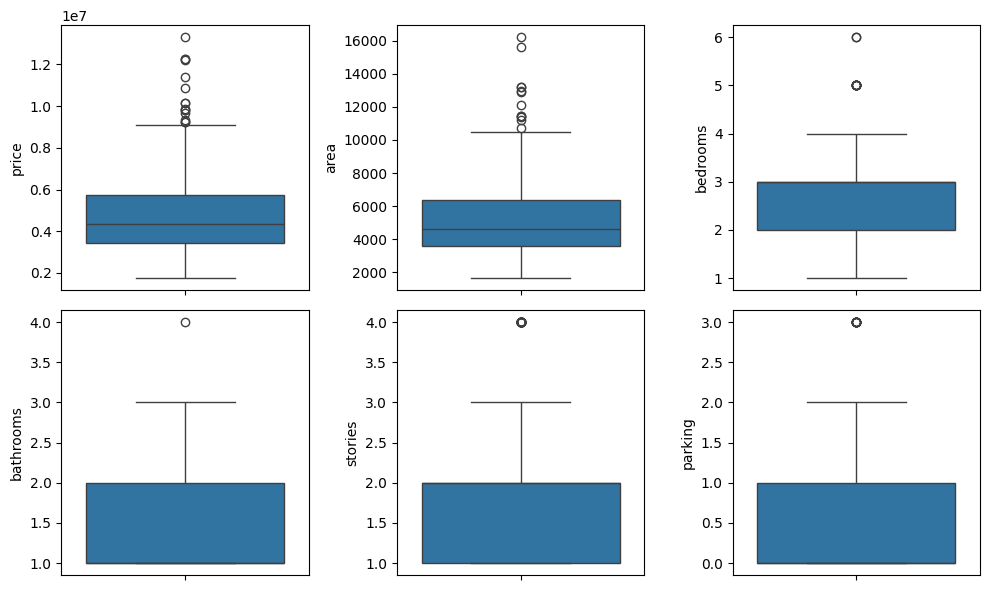

In [307]:
fig, axs = plt.subplots(2,3, figsize=(10, 6))
plt1 = sns.boxplot(df['price'], ax=axs[0,0])
plt2 = sns.boxplot(df['area'], ax=axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax=axs[0,2])
plt4 = sns.boxplot(df['bathrooms'], ax=axs[1,0])
plt5 = sns.boxplot(df['stories'], ax=axs[1,1])
plt6 = sns.boxplot(df['parking'], ax=axs[1,2])
plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x246509488d0>,
 'caps': [<matplotlib.lines.Line2D at 0x246569386d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24650949310>],
 'medians': [<matplotlib.lines.Line2D at 0x24656922850>],
 'fliers': [<matplotlib.lines.Line2D at 0x24656818450>],
 'means': []}

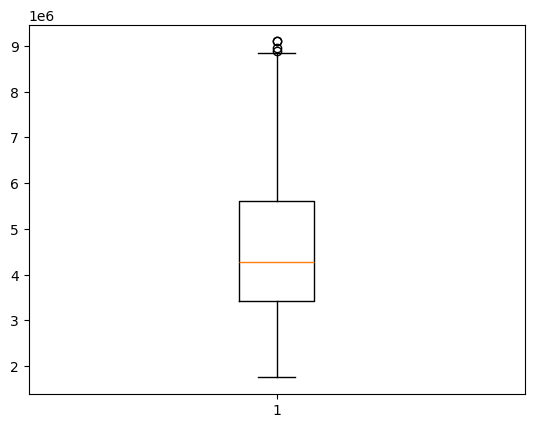

In [308]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1-1.5*IQR)&(df.price <= Q3+1.5*IQR)]
plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x2465121c990>,
 'caps': [<matplotlib.lines.Line2D at 0x2464e25df50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2465121d410>],
 'medians': [<matplotlib.lines.Line2D at 0x24651260ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24651262210>],
 'means': []}

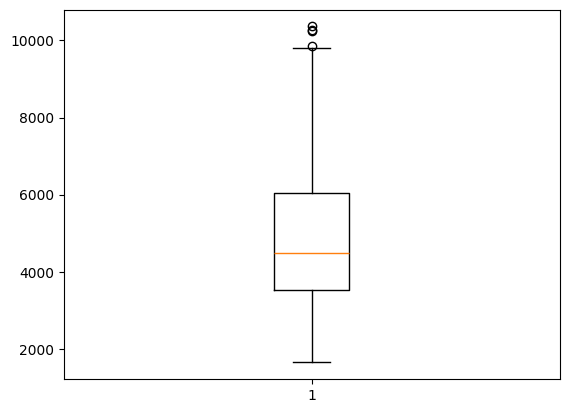

In [309]:
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1-1.5*IQR)&(df.area <= Q3+1.5*IQR)]
plt.boxplot(df.area)

<Axes: >

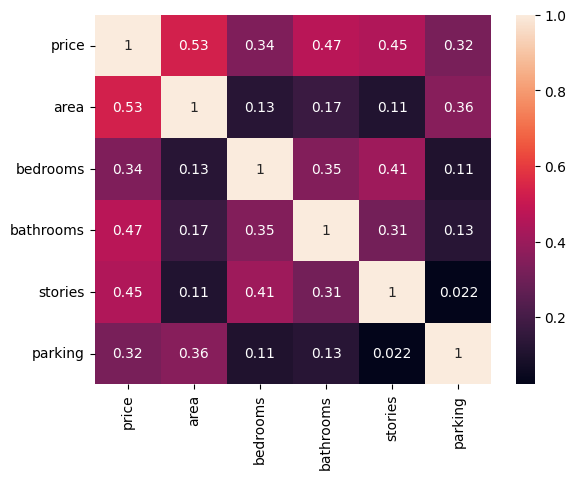

In [310]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='rocket')

In [311]:
status = pd.get_dummies(data[['mainroad', 'furnishingstatus', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first=True)
data = pd.concat([data, status], axis=1)
data.drop(['mainroad', 'furnishingstatus', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis=1, inplace=True)
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,True,False,False,False,False,False,True,True
1,12250000,8960,4,4,4,3,True,False,False,False,False,False,True,False
2,12250000,9960,3,2,2,2,True,True,False,False,True,False,False,True
3,12215000,7500,4,2,2,3,True,False,False,False,True,False,True,True
4,11410000,7420,4,1,2,2,True,False,False,True,True,False,True,False


In [312]:
x = data.drop('price', axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [313]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_train_std = pd.DataFrame(x_train_std, columns=x.columns)

x_test_std = std.transform(x_test)
x_test_std = pd.DataFrame(x_test_std, columns=x.columns)

In [314]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(x_train_std.loc[:,x_train_std.nunique()>=50].columns.values,1,replace=False)

def Evaluate(n, pred1, pred2):
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=y_train, x=x_train_std[i], label='Actual')
        plt.scatter(y=pred1, x=x_train_std[i], label='Prediction')
        plt.legend()
    plt.show()

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(y_train-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(y_test-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, pred2)),20)

    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((y_train - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(y_train,pred1)
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

In [315]:
MLR = LinearRegression().fit(x_train_std,y_train)
pred1 = MLR.predict(x_train_std)
pred2 = MLR.predict(x_test_std)

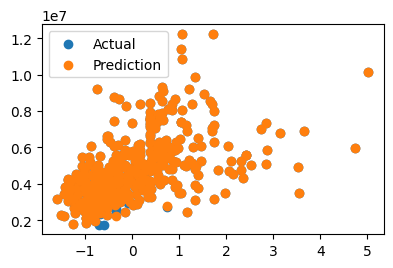

C:\Users\Chamod Lunugama\AppData\Local\Temp\ipykernel_17700\3851111893.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - pred1))


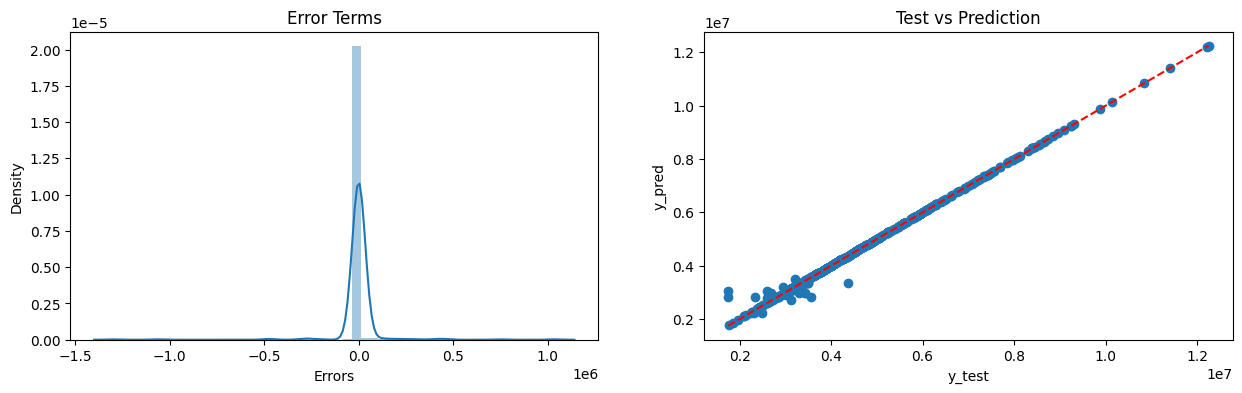

In [316]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(x_train_std)
X_poly1 = poly_reg.fit_transform(x_test_std)
PR = LinearRegression()
PR.fit(X_poly, y_train)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

Evaluate(4, pred1, pred2)